In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-continents/countries_continents.csv


In [23]:
df = pd.read_csv("/kaggle/input/countries-continents/countries_continents.csv")

In [24]:
# to convert string data to numbers

string_df=["Country","Continent"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,string_df)],remainder="passthrough")
transformer_x=transformer.fit_transform(df).toarray()
print(transformer_x)

[[  0.           0.           0.         ...   0.         -69.98267711
   12.52088038]
 [  1.           0.           0.         ...   0.          66.00473366
   33.83523073]
 [  0.           0.           0.         ...   0.          17.53736768
  -12.29336054]
 ...
 [  0.           0.           0.         ...   0.          25.08390093
  -29.00034095]
 [  0.           0.           0.         ...   0.          27.77475946
  -13.45824152]
 [  0.           0.           0.         ...   0.          29.8514412
  -19.00420419]]


In [25]:
pd.DataFrame(transformer_x)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-69.982677,12.520880
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.004734,33.835231
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.537368,-12.293361
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-63.064989,18.223959
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.049834,41.142450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-172.164851,-13.753243
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.586762,15.909280
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.083901,-29.000341
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.774759,-13.458242


In [26]:
d=pd.get_dummies(df[["Country","Continent"]])
df=pd.concat([df,d],axis=1)
x=df.drop(["Country","Continent"],axis=1)
x

,Longitude,Latitude,Country_Afghanistan,Country_Aland,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,...,Country_Zambia,Country_Zimbabwe,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_Seven seas (open ocean),Continent_South America
0,-69.982677,12.520880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,66.004734,33.835231,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,17.537368,-12.293361,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,-63.064989,18.223959,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,20.049834,41.142450,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-172.164851,-13.753243,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
237,47.586762,15.909280,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
238,25.083901,-29.000341,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
239,27.774759,-13.458242,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


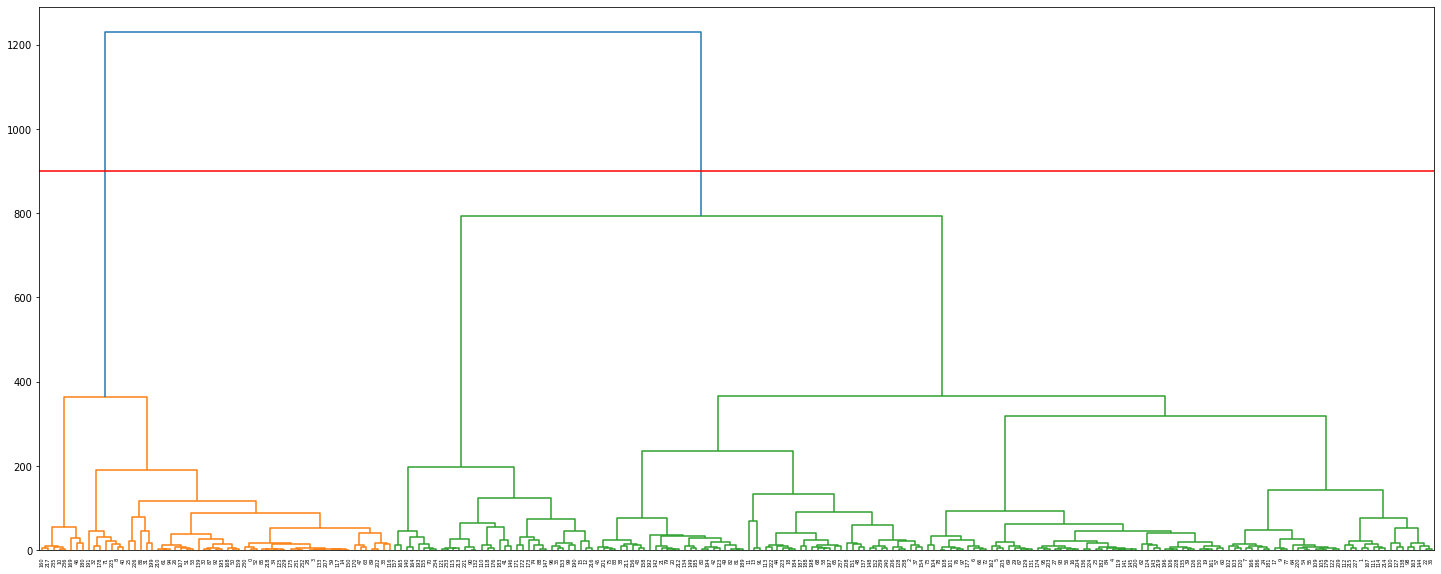

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(transformer_x, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,distance_sort='ascendin)
plt.axhline(y=900, color='r', linestyle='-');


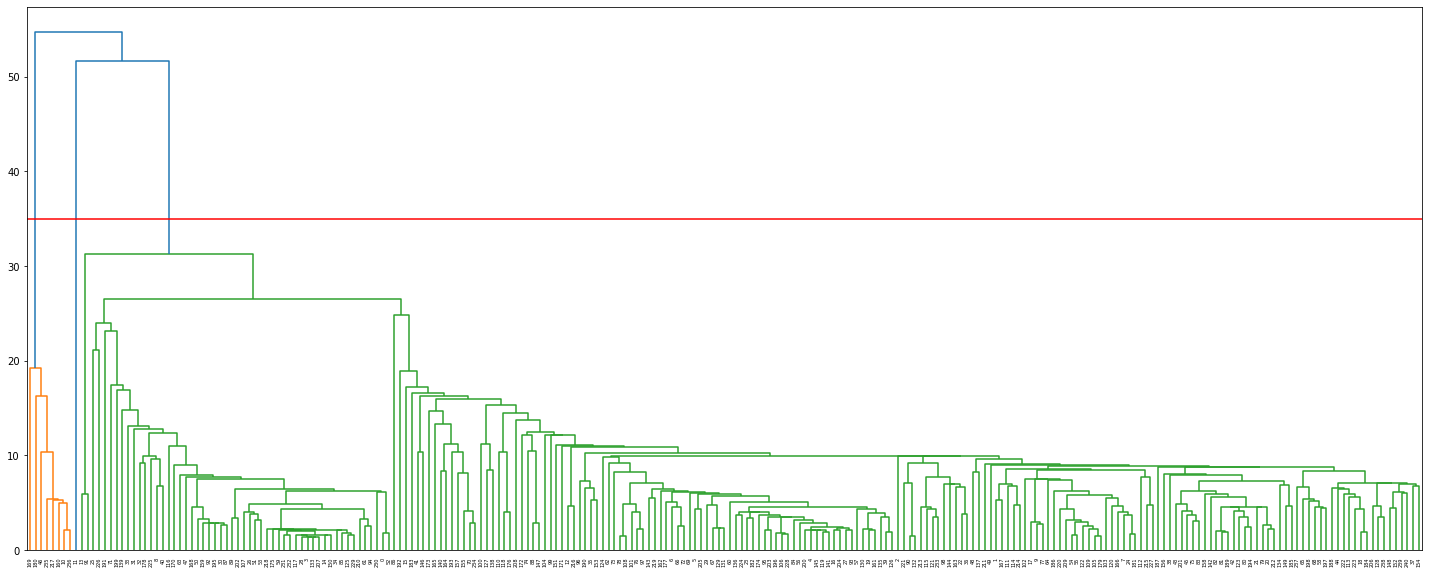

In [28]:

Z = linkage(transformer_x, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=35, color='r', linestyle='-');

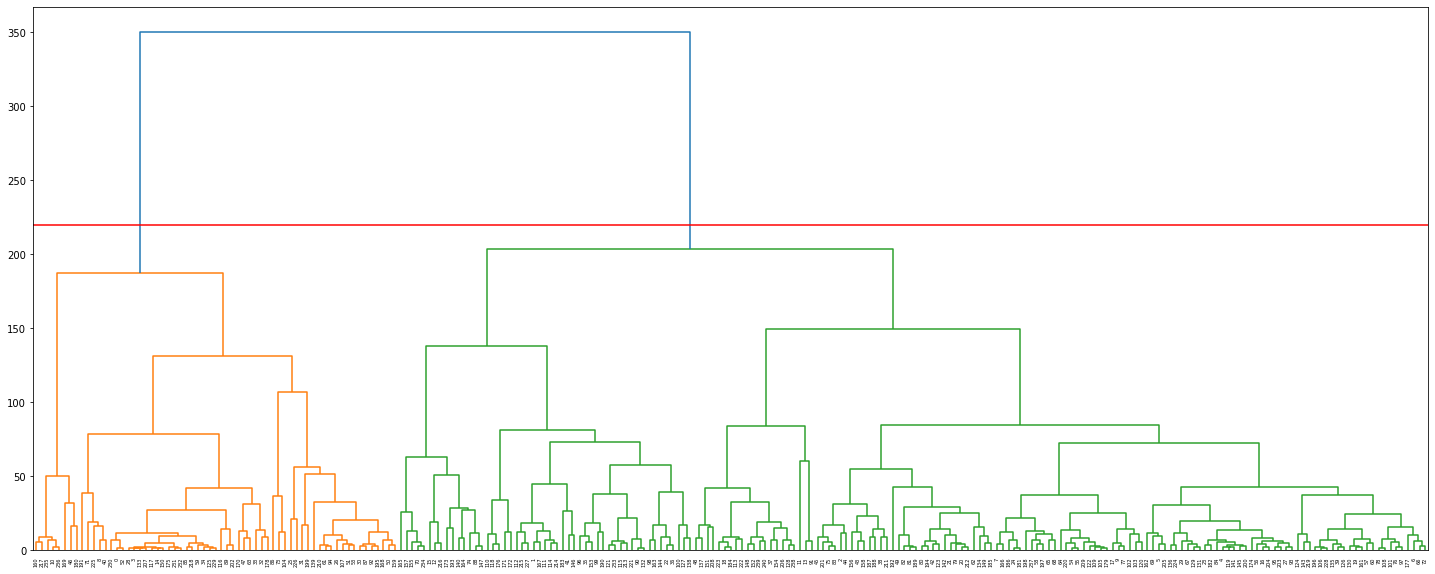

In [29]:

Z = linkage(transformer_x, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=220, color='r', linestyle='-');

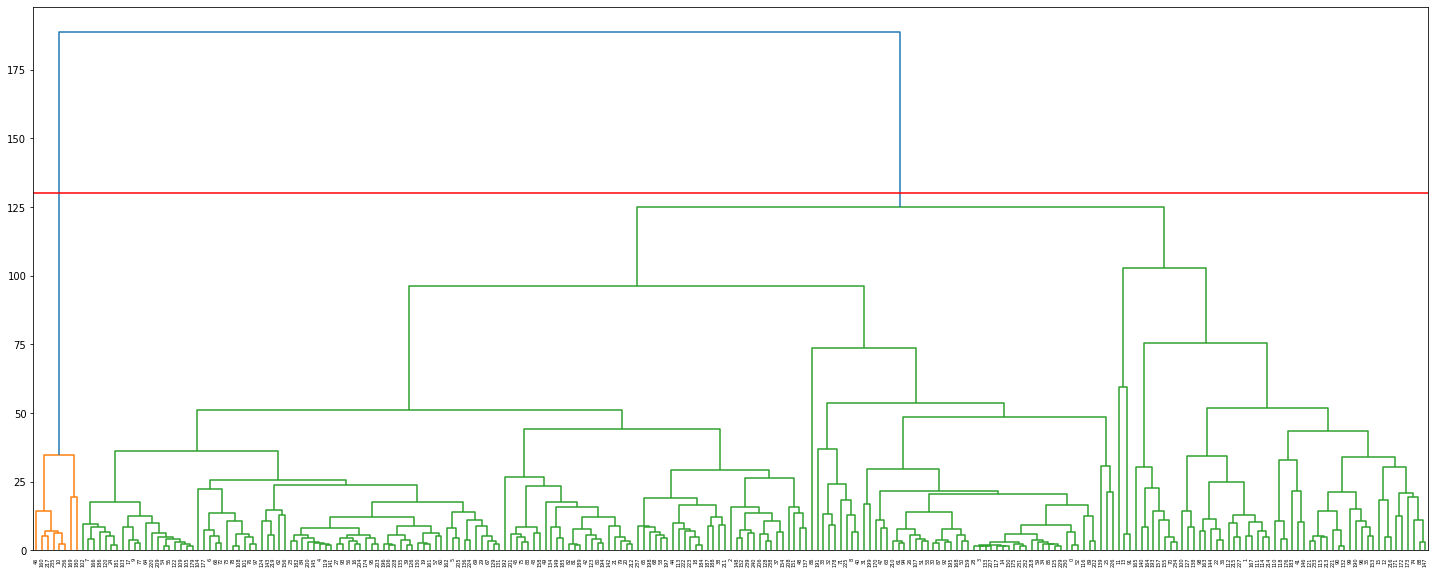

In [30]:

Z = linkage(transformer_x, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=130, color='r', linestyle='-');
